# Employee Attrition  Analysisn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import category_encoders as ce

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
dataset=pd.read_csv("S:\Python\Datascience\INTERNSHIP\project1\Attrition data.csv")
dataset.head()

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,3,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,5,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3


In [4]:
dataset.shape

(4410, 29)

In [5]:
dataset.isna().sum()

EmployeeID                  0
Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
JobInvolvement              0
PerformanceRating           0
dtype: int64

In [6]:
dataset.NumCompaniesWorked.median()

2.0

In [7]:
dataset.EnvironmentSatisfaction.median()

3.0

In [8]:
dataset.JobSatisfaction.median()

3.0

In [9]:
dataset.WorkLifeBalance.median()

3.0

In [10]:
dataset.TotalWorkingYears.median()

10.0

In [11]:
dataset.NumCompaniesWorked=dataset.NumCompaniesWorked.fillna('2')
dataset.EnvironmentSatisfaction=dataset.EnvironmentSatisfaction.fillna('3')
dataset.JobSatisfaction=dataset.JobSatisfaction.fillna('3')
dataset.WorkLifeBalance=dataset.WorkLifeBalance.fillna('3')
dataset.TotalWorkingYears=dataset.TotalWorkingYears.fillna('10')

In [12]:
dataset.isna().any().sum()

0

In [13]:
dataset.dtypes

EmployeeID                  int64
Age                         int64
Attrition                  object
BusinessTravel             object
Department                 object
DistanceFromHome            int64
Education                   int64
EducationField             object
EmployeeCount               int64
Gender                     object
JobLevel                    int64
JobRole                    object
MaritalStatus              object
MonthlyIncome               int64
NumCompaniesWorked         object
Over18                     object
PercentSalaryHike           int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears          object
TrainingTimesLastYear       int64
YearsAtCompany              int64
YearsSinceLastPromotion     int64
YearsWithCurrManager        int64
EnvironmentSatisfaction    object
JobSatisfaction            object
WorkLifeBalance            object
JobInvolvement              int64
PerformanceRating           int64
dtype: object

In [14]:
dataset.drop_duplicates()

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,3,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,5,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4406,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,Female,...,10.0,5,3,0,2,4.0,1.0,3.0,3,3
4406,4407,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,Male,...,10.0,2,3,0,2,4.0,4.0,3.0,2,3
4407,4408,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,Male,...,5.0,4,4,1,2,1.0,3.0,3.0,3,4
4408,4409,42,No,Travel_Rarely,Sales,18,2,Medical,1,Male,...,10.0,2,9,7,8,4.0,1.0,3.0,2,3


In [15]:
dataset.describe()

,EmployeeID,Age,DistanceFromHome,Education,EmployeeCount,JobLevel,MonthlyIncome,PercentSalaryHike,StandardHours,StockOptionLevel,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating
count,4410.000000,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,2205.500000,36.923810,9.192517,2.912925,1.0,2.063946,65029.312925,15.209524,8.0,0.793878,2.799320,7.008163,2.187755,4.123129,2.729932,3.153741
std,1273.201673,9.133301,8.105026,1.023933,0.0,1.106689,47068.888559,3.659108,0.0,0.851883,1.288978,6.125135,3.221699,3.567327,0.711400,0.360742
min,1.000000,18.000000,1.000000,1.000000,1.0,1.000000,10090.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000
25%,1103.250000,30.000000,2.000000,2.000000,1.0,1.000000,29110.000000,12.000000,8.0,0.000000,2.000000,3.000000,0.000000,2.000000,2.000000,3.000000
50%,2205.500000,36.000000,7.000000,3.000000,1.0,2.000000,49190.000000,14.000000,8.0,1.000000,3.000000,5.000000,1.000000,3.000000,3.000000,3.000000
75%,3307.750000,43.000000,14.000000,4.000000,1.0,3.000000,83800.000000,18.000000,8.0,1.000000,3.000000,9.000000,3.000000,7.000000,3.000000,3.000000
max,4410.000000,60.000000,29.000000,5.000000,1.0,5.000000,199990.000000,25.000000,8.0,3.000000,6.000000,40.000000,15.000000,17.000000,4.000000,4.000000


In [16]:
# no.of employees in company and who have left 
dataset['Attrition']

0        No
1       Yes
2        No
3        No
4        No
       ... 
4405     No
4406     No
4407     No
4408     No
4409     No
Name: Attrition, Length: 4410, dtype: object

In [17]:
dataset['Attrition'].value_counts()

Attrition
No     3699
Yes     711
Name: count, dtype: int64

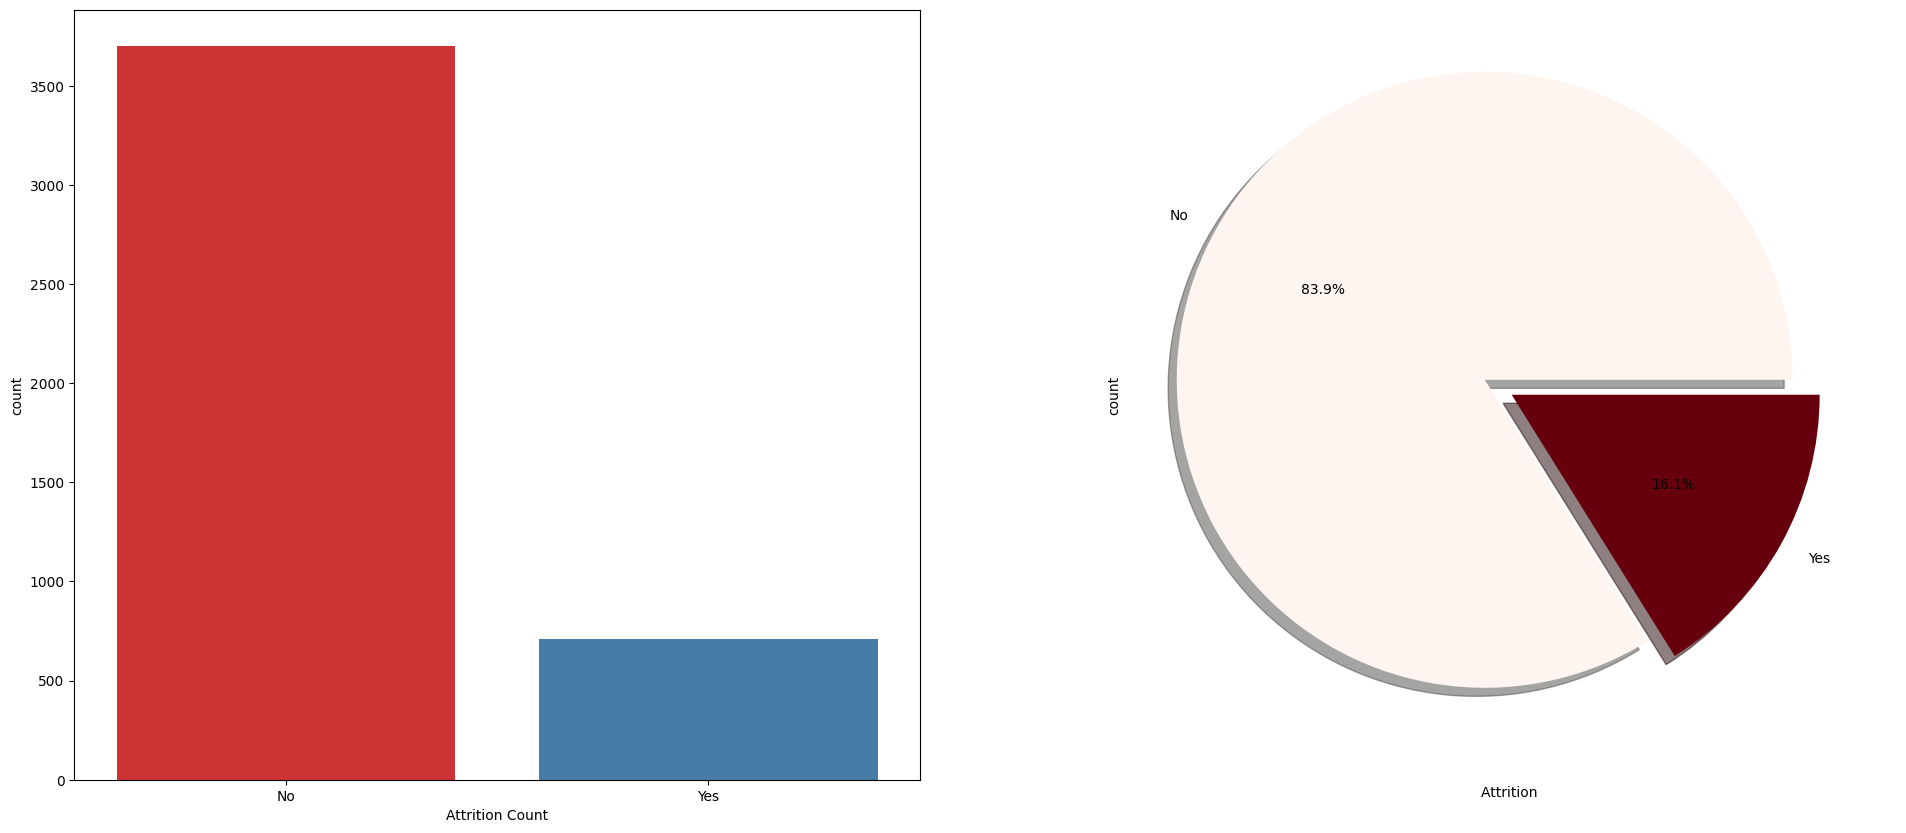

In [18]:
# sns.countplot(dataset,x='Attrition',palette='Set1')
fig,ax=plt.subplots(1, 2, figsize = (24,10))
sns.countplot(data=dataset,x='Attrition',palette='Set1',ax=ax[0])
ax[0].set_xlabel("Attrition Count")
dataset['Attrition'].value_counts().plot.pie(explode=[0.1,0.0],autopct='%1.1f%%',ax=ax[1],shadow=True, cmap='Reds')
ax[1].set_xlabel("Attrition ")
plt.show()

In [19]:
# accuracy when it always predicts no
(3699-711)/3699

0.8077858880778589

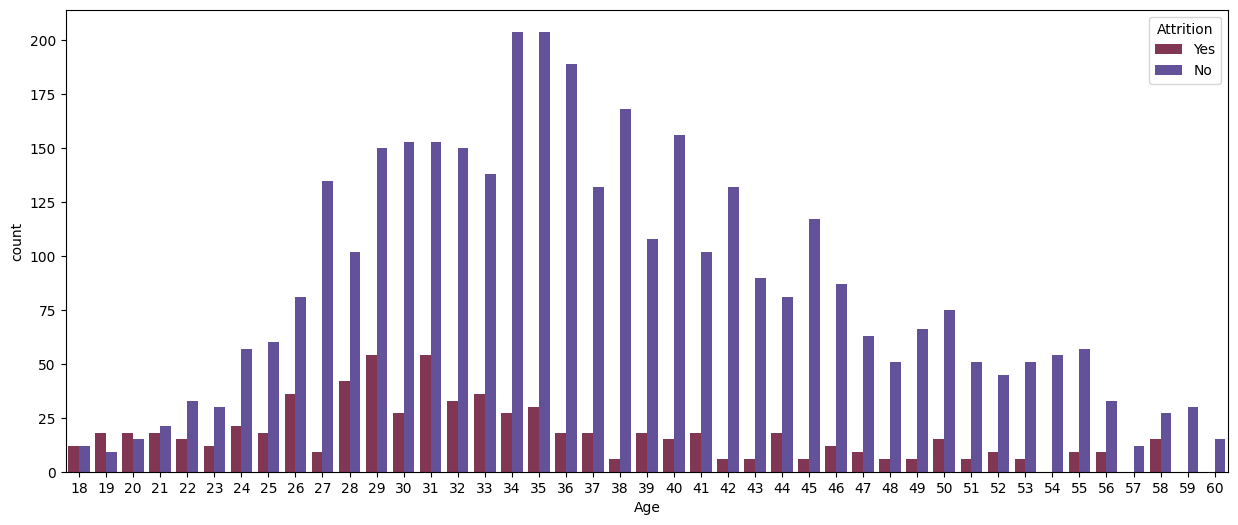

In [20]:
fig_dims=(15,6)
fig,ax=plt.subplots(figsize=fig_dims)
sns.countplot(x='Age',hue="Attrition",ax=ax,palette='twilight_r',data=dataset)
plt.show()


In [21]:
for column in dataset.columns:
  if dataset[column].dtype==object:
    print(f"Column : {str(dataset[column].unique())}")
    print(dataset[column].value_counts())
    print('========================================================')

Column : ['No' 'Yes']
Attrition
No     3699
Yes     711
Name: count, dtype: int64
Column : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
BusinessTravel
Travel_Rarely        3129
Travel_Frequently     831
Non-Travel            450
Name: count, dtype: int64
Column : ['Sales' 'Research & Development' 'Human Resources']
Department
Research & Development    2883
Sales                     1338
Human Resources            189
Name: count, dtype: int64
Column : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
EducationField
Life Sciences       1818
Medical             1392
Marketing            477
Technical Degree     396
Other                246
Human Resources       81
Name: count, dtype: int64
Column : ['Female' 'Male']
Gender
Male      2646
Female    1764
Name: count, dtype: int64
Column : ['Healthcare Representative' 'Research Scientist' 'Sales Executive'
 'Human Resources' 'Research Director' 'Laboratory Technician'
 'Manufacturing Director' 'Sale

Text(0.5, 1.0, 'Attrition Probability')

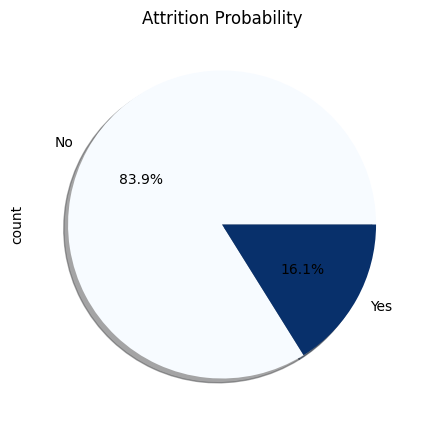

In [22]:
f,ax= plt.subplots(figsize=(5,5))
ax= dataset['Attrition'].value_counts().plot.pie(explode=[0,0],autopct ='%1.1f%%',shadow=True, cmap='Blues')
ax.set_title('Attrition Probability')

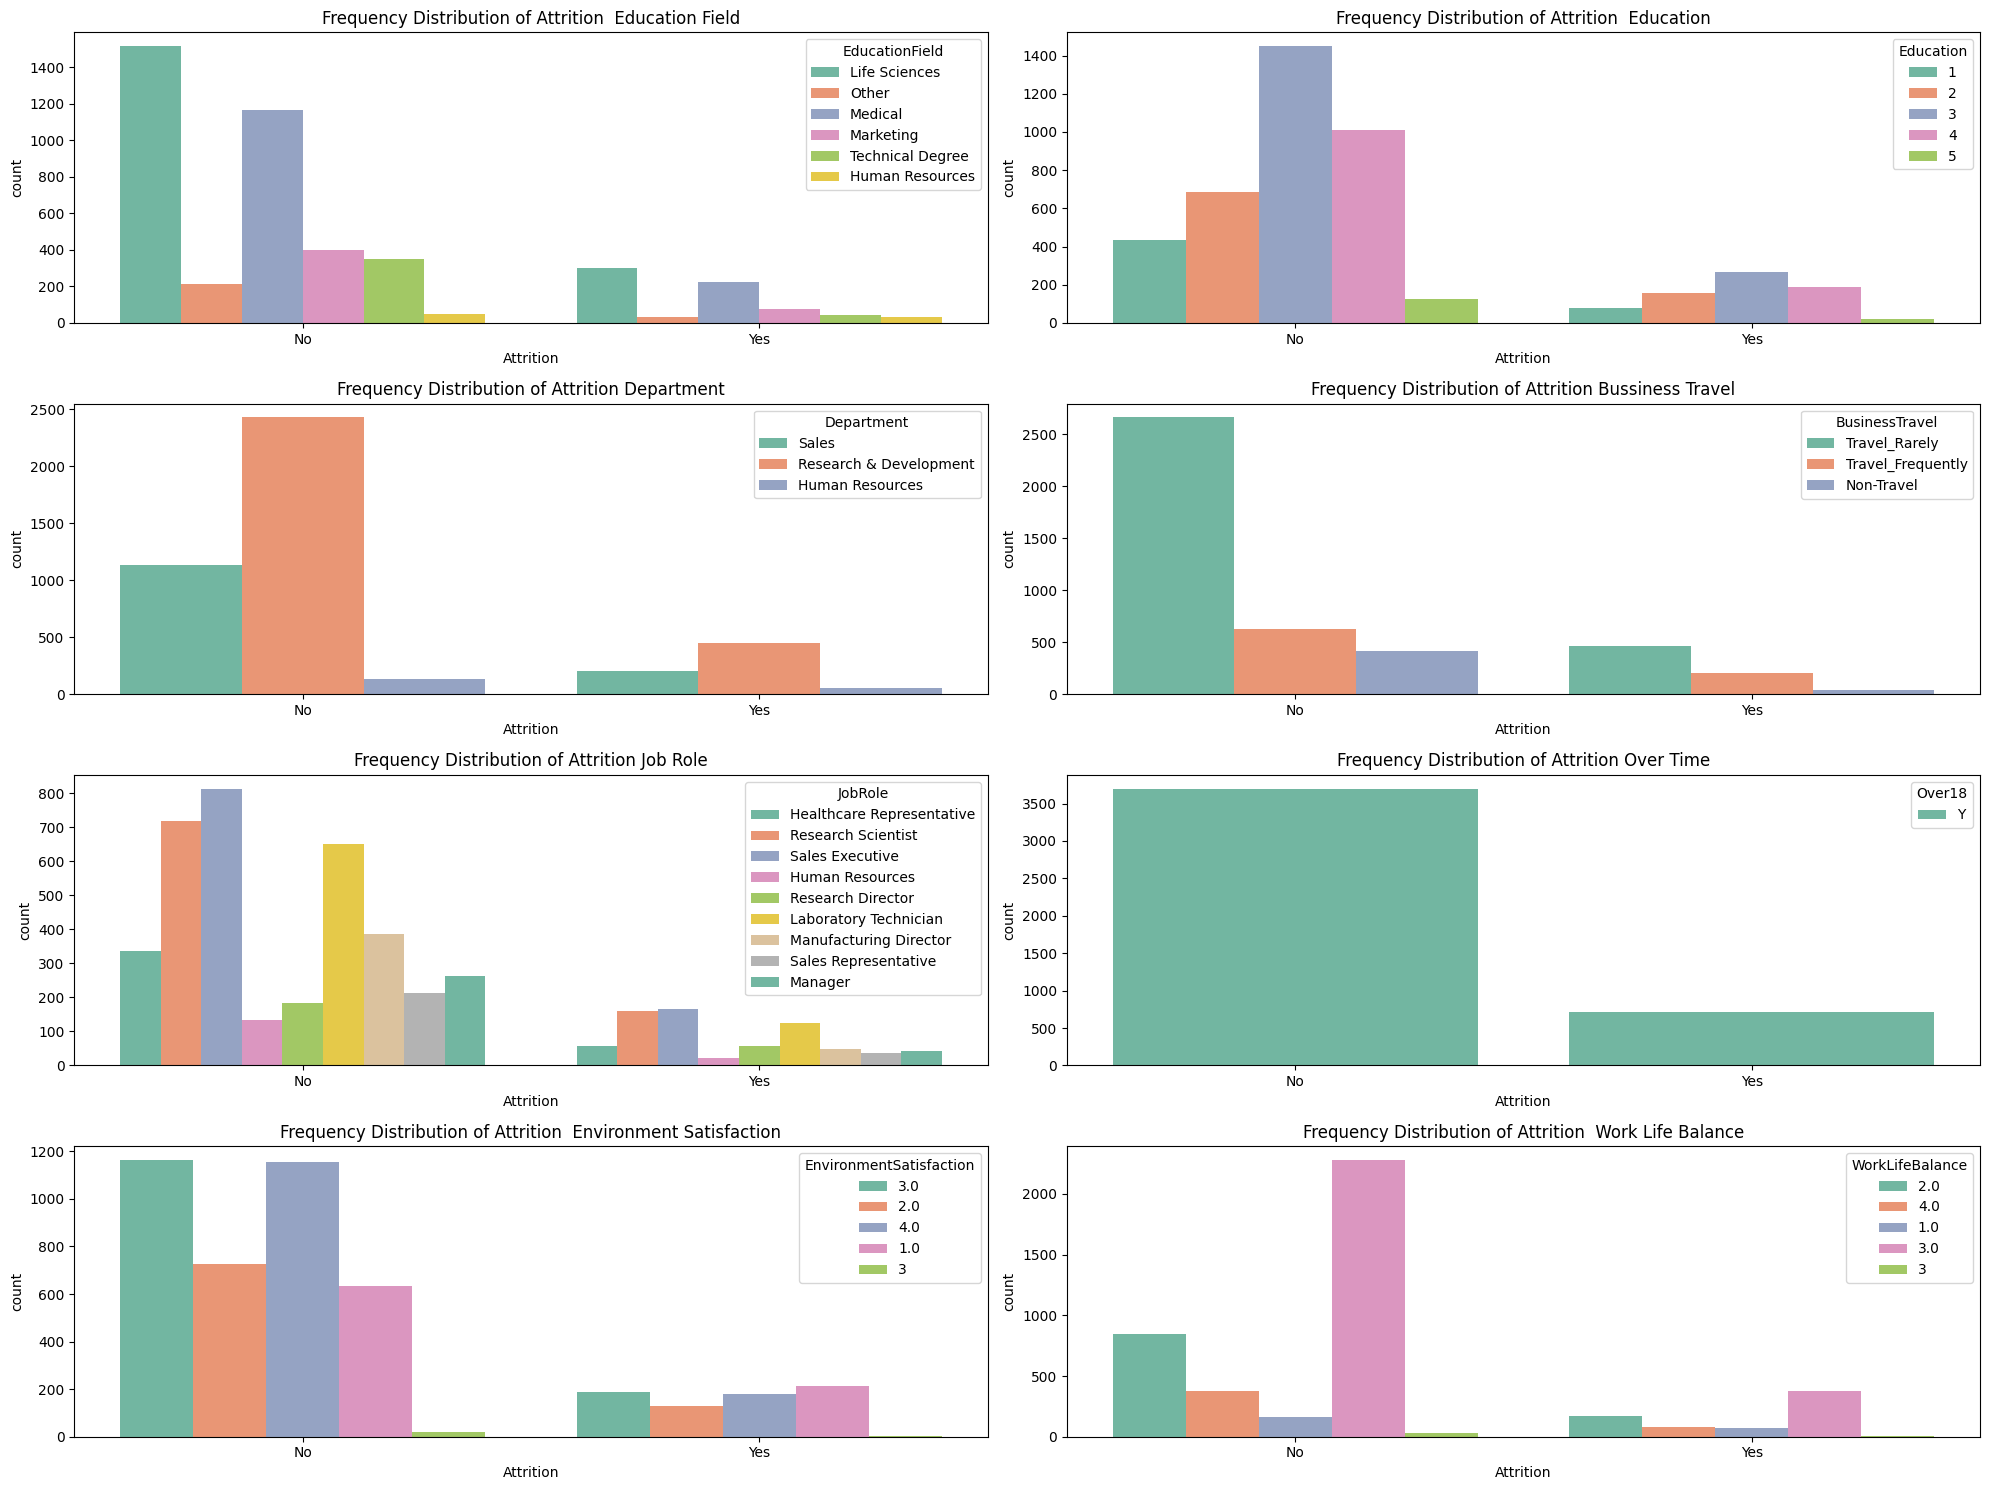

In [23]:
f, ax = plt.subplots(4,2, figsize=(20,15))

ax[0,0] = sns.countplot(x='Attrition', hue= 'EducationField', data=dataset, ax = ax[0,0], palette='Set2' )
ax[0,0].set_title("Frequency Distribution of Attrition  Education Field")

ax[1,0] = sns.countplot(x='Attrition', hue= 'Department', data=dataset,  ax = ax[1,0], palette='Set2' )
ax[1,0].set_title("Frequency Distribution of Attrition Department")

ax[0,1] = sns.countplot(x='Attrition', hue= 'Education', data=dataset,  ax = ax[0,1], palette='Set2' )
ax[0,1].set_title("Frequency Distribution of Attrition  Education")

ax[1,1] = sns.countplot(x='Attrition', hue= 'BusinessTravel', data=dataset,  ax = ax[1,1], palette='Set2' )
ax[1,1].set_title("Frequency Distribution of Attrition Bussiness Travel")

ax[2,0] = sns.countplot(x='Attrition', hue= 'JobRole', data=dataset, ax = ax[2,0], palette='Set2' )
ax[2,0].set_title("Frequency Distribution of Attrition Job Role")

ax[2,1] = sns.countplot(x='Attrition', hue= 'Over18', data=dataset,  ax = ax[2,1],palette='Set2' )
ax[2,1].set_title("Frequency Distribution of Attrition Over Time")

ax[3,0] = sns.countplot(x='Attrition', hue= 'EnvironmentSatisfaction', data=dataset,  ax = ax[3,0],palette='Set2' )
ax[3,0].set_title("Frequency Distribution of Attrition  Environment Satisfaction")

ax[3,1] = sns.countplot(x='Attrition', hue='WorkLifeBalance', data=dataset, ax = ax[3,1], palette='Set2')
ax[3,1].set_title("Frequency Distribution of Attrition  Work Life Balance")

f.tight_layout()

In [24]:
column_list = ['EmployeeID','Attrition','EmployeeCount','Over18','StandardHours']
x = dataset.drop(column_list, axis = 1)
y = dataset['Attrition']

In [25]:
x.columns

Index(['Age', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'Gender', 'JobLevel', 'JobRole', 'MaritalStatus',
       'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'JobInvolvement', 'PerformanceRating'],
      dtype='object')

In [26]:
y

0        No
1       Yes
2        No
3        No
4        No
       ... 
4405     No
4406     No
4407     No
4408     No
4409     No
Name: Attrition, Length: 4410, dtype: object

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2,random_state=42 )

In [29]:
print(X_train.shape, X_test.shape)

(3528, 24) (882, 24)


In [30]:
encoder = ce.OrdinalEncoder(cols = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.fit_transform(X_test)

In [31]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=10)

In [32]:
from sklearn.preprocessing import StandardScaler
Scaler= StandardScaler()

X_train=Scaler.fit_transform(X_train)
X_test=Scaler.transform(X_test)


In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=12)

In [34]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=12)

In [35]:
from sklearn.metrics import accuracy_score
Knc=knn.predict(X_test)
knn=accuracy_score(Y_test,Knc)*100
knn

84.12698412698413

In [36]:
from sklearn.svm import SVC

In [37]:
model2=SVC(kernel='linear')

In [38]:
model2.fit(X_train,Y_train)

SVC(kernel='linear')

In [39]:
#from sklearn.metrics import accuracy_score

Svc=model2.predict(X_test)
svm=accuracy_score(Y_test,Svc)*100
svm

84.01360544217688

In [40]:
from sklearn .tree import DecisionTreeClassifier 

In [41]:
Classifier=DecisionTreeClassifier(criterion='gini' )
Classifier.fit(X_train,Y_train)

DecisionTreeClassifier()

In [42]:
Dtc=Classifier.score(X_test,Y_test)*100
Dtc

95.01133786848072

In [43]:
from sklearn .ensemble import  RandomForestClassifier

In [44]:
rfc = RandomForestClassifier(n_estimators=100, random_state=0)
rfc.fit(X_train, Y_train)


RandomForestClassifier(random_state=0)

In [45]:
Rfc=rfc.score(X_test,Y_test)*100
Rfc

96.5986394557823

In [46]:
frame = {'Algorithm used': ('K_Neighbors_Classifier','Support_Vector_Classifier','Decision_Tree_Classifier','Random_Forest_Classifier'),
     'Classifier score': (knn,svm,Dtc,Rfc)} 
new = pd.DataFrame(frame)

new

,Algorithm used,Classifier score
0,K_Neighbors_Classifier,84.126984
1,Support_Vector_Classifier,84.013605
2,Decision_Tree_Classifier,95.011338
3,Random_Forest_Classifier,96.598639


In [47]:
y_pred = rfc.predict(X_test)

In [48]:
print(len(y_pred))

882


In [49]:
unique, counts = np.unique(y_pred, return_counts=True)
dict(zip(unique, counts))

{'No': 765, 'Yes': 117}

# Conclusions